In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [30]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [31]:
data['area'].count

<bound method Series.count of 0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64>

In [32]:
data=data.drop(['X','Y','month','day'],axis=1)

In [33]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Regression


In [34]:
from pycaret.regression import *
reg1 = setup(data = data, target = 'area')

,Description,Value
0,Session id,204
1,Target,area
2,Target type,Regression
3,Data shape,"(517, 9)"
4,Train data shape,"(361, 9)"
5,Test data shape,"(156, 9)"
6,Numeric features,8
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [35]:
best_model=compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,14.8555,2056.0757,32.7413,-0.0531,1.9031,3.6900,0.0210
dummy,Dummy Regressor,14.8555,2056.0757,32.7413,-0.0531,1.9031,3.6900,0.0180
br,Bayesian Ridge,14.8914,2052.8322,32.7446,-0.0617,1.9016,3.8085,0.0210
huber,Huber Regressor,10.7073,2122.6632,33.4645,-0.0955,1.3648,0.8890,0.0340
omp,Orthogonal Matching Pursuit,15.3244,2065.9388,33.1714,-0.1521,1.8786,4.1110,0.0190
lasso,Lasso Regression,15.9105,2088.6173,33.6990,-0.2291,1.9358,4.3848,0.0300
en,Elastic Net,15.9264,2090.8754,33.7332,-0.2328,1.9344,4.3887,0.0240
ridge,Ridge Regression,16.1223,2103.0622,33.9027,-0.2454,1.9402,4.4354,0.0210
lr,Linear Regression,16.3052,2131.8253,34.2781,-0.2702,1.9435,4.4683,0.1100
lar,Least Angle Regression,16.5377,2140.3326,34.5008,-0.3350,1.9583,4.6319,0.0210


In [36]:
print(best_model)

[LassoLars(random_state=204), DummyRegressor(), BayesianRidge()]


In [39]:
huber_model=create_model('huber', fold = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.4600,392.6849,19.8163,-0.0860,1.2516,0.5726
1,9.1777,226.2905,15.0430,-0.3375,1.4539,0.7593
2,4.8631,120.2177,10.9644,-0.0252,1.1398,0.6646
3,8.5965,356.5469,18.8825,-0.1510,1.4126,0.8783
4,15.3645,1855.4065,43.0744,-0.1169,1.5298,0.5518
5,2.5467,11.7105,3.4221,-0.0611,0.9444,0.9437
6,10.1346,497.5819,22.3065,-0.1621,1.4356,0.8717
7,8.0857,451.4537,21.2474,-0.0842,1.2705,0.7032
8,3.6313,22.8802,4.7833,-0.0790,1.1534,2.2270


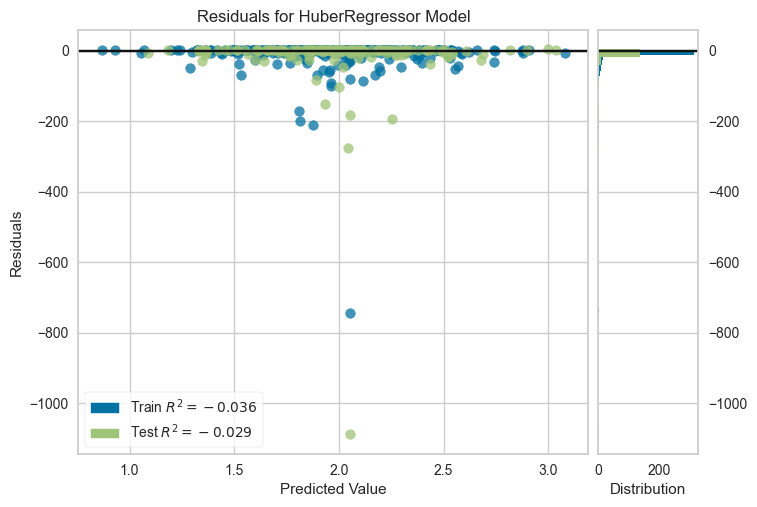

In [42]:
plot_model(huber_model)

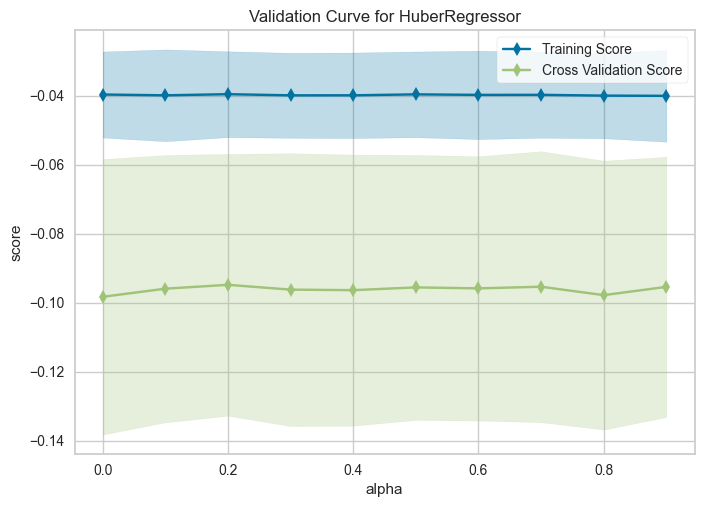

In [43]:
plot_model(huber_model,'vc')

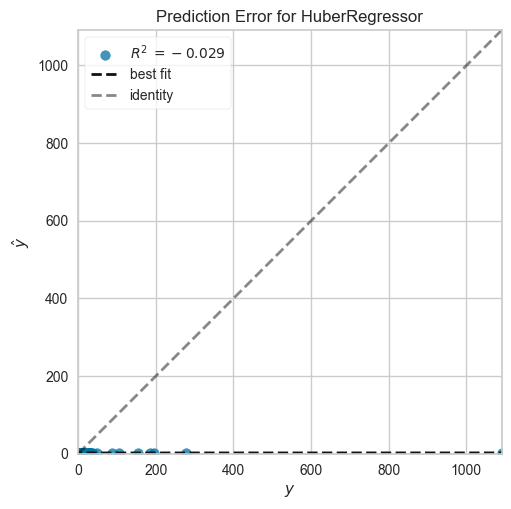

In [44]:
plot_model(huber_model,'error')

##### Classification

In [47]:
def preprocessing(df):
    df=df.copy()
    df['area']=df['area'].apply(lambda x: 1 if x>0 else 0)
    return df

In [48]:
df=preprocessing(data)

In [49]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0


In [50]:
from pycaret.classification import *
reg2 = setup(data = df, target = 'area')

,Description,Value
0,Session id,5092
1,Target,area
2,Target type,Binary
3,Original data shape,"(517, 9)"
4,Transformed data shape,"(517, 9)"
5,Transformed train set shape,"(361, 9)"
6,Transformed test set shape,"(156, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [58]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5404,0.5332,0.5766,0.5637,0.5674,0.0770,0.0778,0.1300
knn,K Neighbors Classifier,0.5346,0.5436,0.5813,0.5558,0.5661,0.0631,0.0636,0.0330
qda,Quadratic Discriminant Analysis,0.5261,0.4985,0.6874,0.5227,0.5810,0.0347,0.0293,0.0250
lightgbm,Light Gradient Boosting Machine,0.5236,0.4895,0.5661,0.5474,0.5529,0.0422,0.0425,0.0340
dummy,Dummy Classifier,0.5236,0.5000,1.0000,0.5236,0.6873,0.0000,0.0000,0.0230
ridge,Ridge Classifier,0.5152,0.0000,0.6620,0.5309,0.5878,0.0155,0.0138,0.0200
lda,Linear Discriminant Analysis,0.5124,0.4996,0.6620,0.5287,0.5865,0.0096,0.0076,0.0260
lr,Logistic Regression,0.5099,0.4836,0.6608,0.5269,0.5848,0.0050,0.0025,0.0370
et,Extra Trees Classifier,0.5071,0.5267,0.5713,0.5348,0.5498,0.0063,0.0047,0.1150
svm,SVM - Linear Kernel,0.5069,0.0000,0.7632,0.4184,0.5396,-0.0075,-0.0386,0.0190


In [59]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5092, verbose=0, warm_start=False)


In [56]:
random_forest_model=create_model('rf', fold = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3684,0.4944,0.5000,0.4167,0.4545,-0.2809,-0.2875
1,0.5000,0.4500,0.6000,0.5455,0.5714,-0.0253,-0.0255
2,0.4444,0.3812,0.6000,0.5000,0.5455,-0.1538,-0.1581
3,0.6667,0.5875,0.8000,0.6667,0.7273,0.3077,0.3162
4,0.6111,0.6250,0.6000,0.6667,0.6316,0.2222,0.2236
5,0.7222,0.7250,0.7000,0.7778,0.7368,0.4444,0.4472
6,0.6667,0.5812,0.8000,0.6667,0.7273,0.3077,0.3162
7,0.5000,0.5625,0.6000,0.5455,0.5714,-0.0253,-0.0255
8,0.3333,0.2812,0.3000,0.3750,0.3333,-0.3171,-0.3250


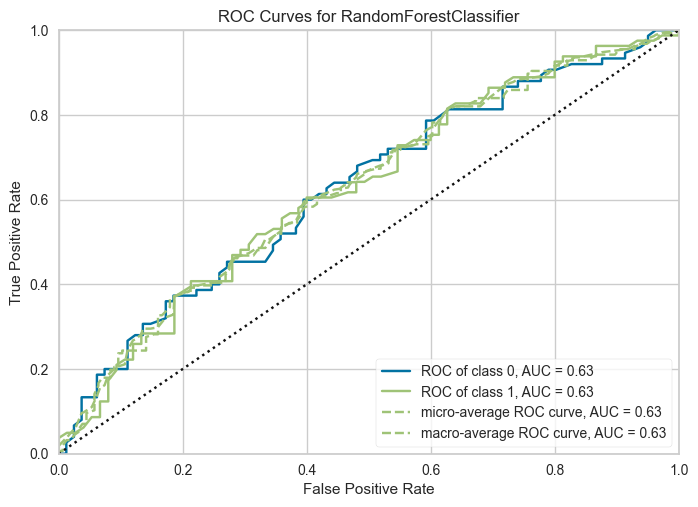

In [57]:
plot_model(random_forest_model)

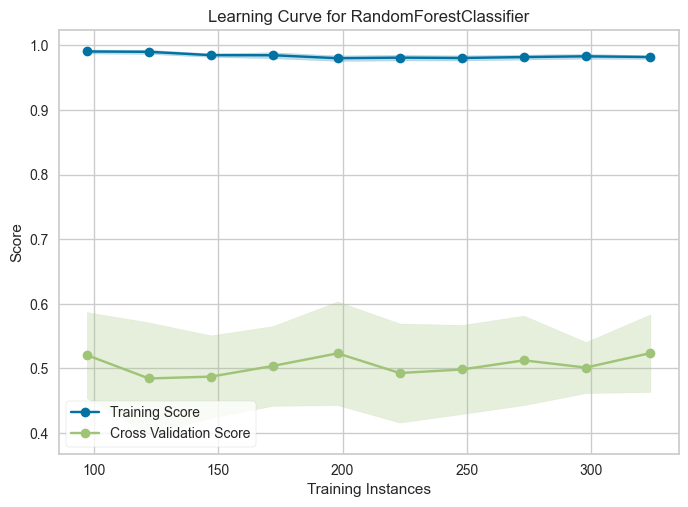

In [60]:
plot_model(random_forest_model,'learning')

In [62]:
tuned_random_forest=tune_model(random_forest_model,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5676,0.5892,0.5263,0.5882,0.5556,0.1370,0.1378
1,0.6111,0.6037,0.5789,0.6471,0.6111,0.2246,0.2260
2,0.4722,0.5279,0.5789,0.5000,0.5366,-0.0687,-0.0698
3,0.5278,0.5433,0.6316,0.5455,0.5854,0.0438,0.0444
4,0.3889,0.3684,0.3684,0.4118,0.3889,-0.2185,-0.2198
5,0.5278,0.5991,0.4211,0.5714,0.4848,0.0671,0.0698
6,0.6944,0.6455,0.6316,0.7500,0.6857,0.3926,0.3981
7,0.5000,0.5542,0.4211,0.5333,0.4706,0.0092,0.0094
8,0.5278,0.3963,0.5263,0.5556,0.5405,0.0556,0.0556


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


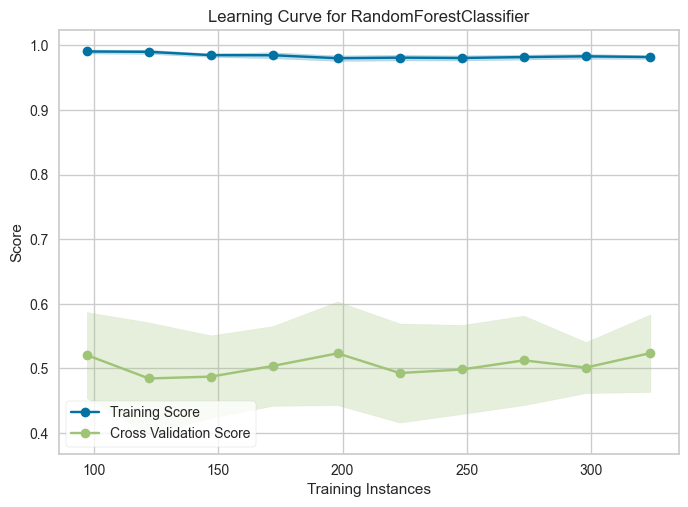

In [63]:
plot_model(tuned_random_forest,'learning')

In [64]:
save_model(tuned_random_forest,'forestfiremodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\Hp\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['FFMC', 'DMC', 'DC', 'ISI', 'temp',
                                              'RH', 'wind', 'rain'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Trans...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=Non